Loaded Species Tree with 20 nodes.
Found 230 unique transfer paths.


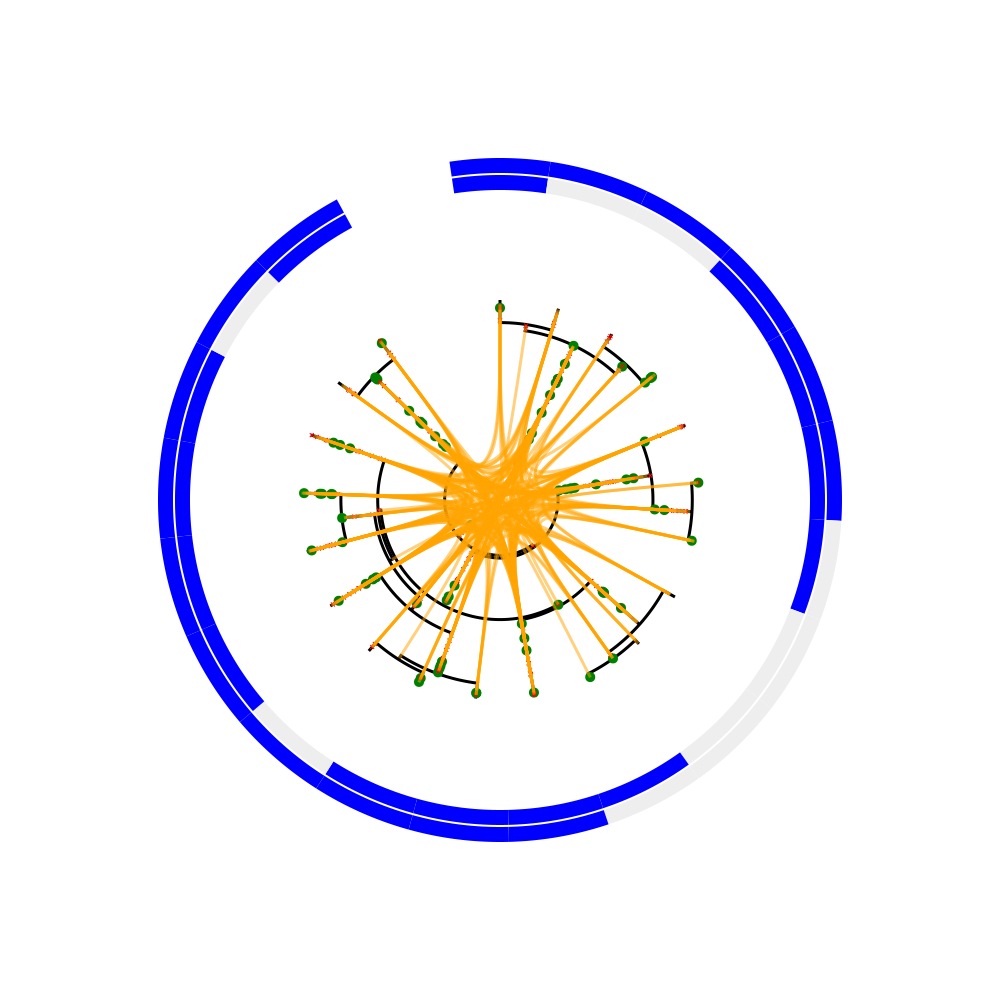

In [1]:
import phylustrator as ph
import phylustrator.zombi_parser as zp

# 1. Parse Zombi Output
# -----------------------------
# Point this to the parent folder containing "T" and "G"
zombi_data = zp.parse_zombi("/Users/aadria/Desktop/Github/ZOMBI/Output_folder")


print(f"Loaded Species Tree with {len(zombi_data.species_tree)} nodes.")
print(f"Found {len(zombi_data.transfers)} unique transfer paths.")

# 2. Setup Drawer
# -----------------------------
style = ph.TreeStyle(radius=200, node_size=0, branch_size=3, leaf_size=0, degrees=340)
drawer = ph.RadialTreeDrawer(zombi_data.species_tree, style=style)

# 3. Draw Base Tree (Colored by Total Transfers?)
# -----------------------------
# Let's highlight branches that are "Hotspots" for donating genes
stats_map = zombi_data.aggregated_stats.set_index("species").to_dict(orient="index")


drawer.draw()

# 4. Add Transfer Curves
# -----------------------------
# Zombi transfers have integer frequencies (e.g., 50 events).
# We can normalize opacity so 1 event is faint, 50 is solid.
max_freq = max([t['freq'] for t in zombi_data.transfers]) if zombi_data.transfers else 1

# Custom opacity scaler
# freq / max_freq might be too faint for small numbers. Let's try a log scale or simple multiplier.
#drawer.add_transfer_links(
#    zombi_data.transfers,
#    gradient_colors=("gold", "darkred"), # Gold (Source) -> Red (Target)
#    opacity_scale=1.0 / max_freq * 2.0,  # Tuning factor
#    curve_factor=0.5
#)

# 5. Add Heatmap (Duplications/Losses)
# -----------------------------
heatmap_data = {}
for n in zombi_data.species_tree.get_leaves():
    if n.name in stats_map:
        heatmap_data[n.name] = {
            "Dup": stats_map[n.name]['duplications'],
            "Loss": stats_map[n.name]['losses']
        }

drawer.add_heatmap_matrix(heatmap_data, columns=["Dup", "Loss"], start_radius=310, ring_width=15, cmap=lambda x: "blue" if x > 0 else "#eee")
drawer.mark_events(zombi_data.raw_events, type_filter="D", color="green", size=5)
drawer.mark_events(zombi_data.raw_events, type_filter="L", color="red", shape="x", size=2)
drawer.add_transfer_links(zombi_data.transfers, curve_factor=1., opacity_scale=0.5)
#drawer.save_figure("zombi_simulation.svg")
display(drawer.d)

In [9]:
len(zombi_data.transfers)

230

Figure saved to zombi_linear_chronogram.svg


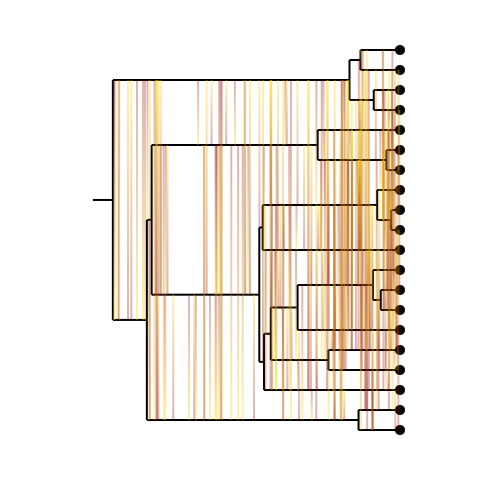

In [10]:
import phylustrator as ph

# Use Vertical Drawer
v_style = ph.TreeStyle(width=500, height=500, node_size=0, branch_size=2)
v_drawer = ph.VerticalTreeDrawer(zombi_data.species_tree, style=v_style)
v_drawer.draw()

# 1. Exact Events
#v_drawer.mark_events(zombi_data.raw_events, type_filter="D", color="green", size=3)
#v_drawer.mark_events(zombi_data.raw_events, type_filter="L", color="red", shape="x", size=3)

# 2. Exact Transfers (Sigmoid Curves)
v_drawer.add_transfer_links(
    zombi_data.transfers, 
    gradient_colors=("gold", "darkred"),
    opacity_scale=0.3
)

# 3. Heatmap Matrix (works same as before)
# ... add_heatmap_matrix ...

v_drawer.save_figure("zombi_linear_chronogram.svg")
display(v_drawer.d)